<a href="https://colab.research.google.com/github/Oksana0020/DL-with-PyTorch/blob/main/Multilayer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi layer perceptron



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting


def plot_tensor_blocks(tensor_data, title="Tensor Visualization"):
    """
    Visualizes a tensor (0D to 3D) as blocks in 3D space using matplotlib.

    Args:
        tensor_data (torch.Tensor or list/number): The data to visualize.
        title (str): Plot title.
    """
    # Convert to numpy array if it's a PyTorch tensor or Python list/number
    if hasattr(tensor_data, "cpu"):  # torch.Tensor
        tensor_np = tensor_data.cpu().numpy()
    else:
        tensor_np = np.array(tensor_data)

    ndim = tensor_np.ndim

    if ndim > 3:
        print(f"Visualization for {ndim}D tensor is not supported by this function.")
        print("Only 0D, 1D, 2D, or 3D tensors can be visualized as blocks.")
        return

    # Handle empty tensor case
    if ndim == 0 and tensor_np.size == 0:
        print(f"Cannot visualize empty tensor: {tensor_data}")
        return

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")
    ax.set_title(f"{title}\nShape: {tensor_np.shape}", fontsize=10)

    # 0D: Scalar
    if ndim == 0:
        ax.bar3d(0, 0, 0, 1, 1, float(tensor_np), shade=True, edgecolor="k")
        ax.set_xlim([-0.5, 1.5])
        ax.set_ylim([-0.5, 1.5])
        ax.set_zlim([0, max(1.0, float(tensor_np) + 0.5)])

    # 1D: Vector
    elif ndim == 1:
        for i in range(tensor_np.shape[0]):
            ax.bar3d(i, 0, 0, 1, 1, float(tensor_np[i]), shade=True, edgecolor="k")
        ax.set_xlim([-0.5, tensor_np.shape[0] + 0.5])
        ax.set_ylim([-0.5, 1.5])
        ax.set_zlim([0, max(1.0, float(np.max(tensor_np)) + 0.5)])

    # 2D: Matrix
    elif ndim == 2:
        rows, cols = tensor_np.shape
        for r in range(rows):
            for c in range(cols):
                ax.bar3d(c, r, 0, 1, 1, float(tensor_np[r, c]), shade=True, edgecolor="k")
        ax.set_xlim([-0.5, cols + 0.5])
        ax.set_ylim([-0.5, rows + 0.5])
        ax.set_zlim([0, max(1.0, float(np.max(tensor_np)) + 0.5)])

    # 3D: Tensor
    elif ndim == 3:
        depth, rows, cols = tensor_np.shape
        for d in range(depth):
            for r in range(rows):
                for c in range(cols):
                    ax.bar3d(
                        c, r, d, 1, 1, float(tensor_np[d, r, c]),
                        shade=True, edgecolor="k"
                    )
        ax.set_xlim([-0.5, cols + 0.5])
        ax.set_ylim([-0.5, rows + 0.5])
        ax.set_zlim([-0.5, depth + 0.5])

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.tight_layout()
    plt.show()


Scalar Tensor:
tensor(7)
Value: 7 (use .item() to get Python number from a scalar tensor)
Shape: torch.Size([]) (empty, indicating a scalar)
Dimensions (ndim): 0 (0 dimensions)
Data type (dtype): torch.int64


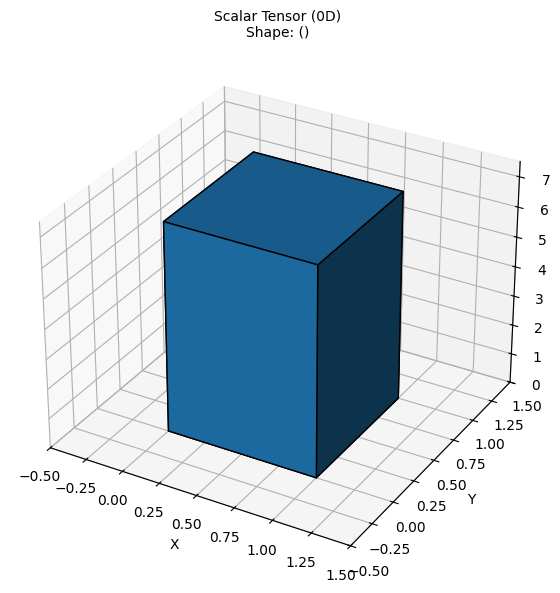


Vector Tensor:
tensor([1, 2, 3])
Shape: torch.Size([3]) (3 elements in the first dimension)
Dimensions (ndim): 1 (1 dimension)
Data type (dtype): torch.int64


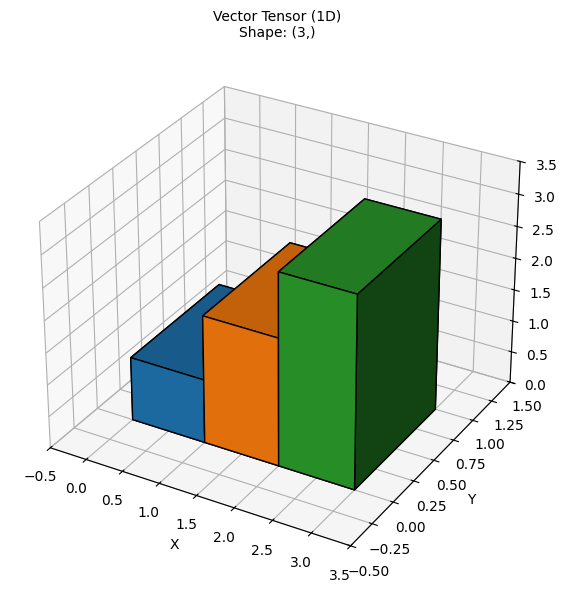


Zeros Tensor (2x3):
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Shape: torch.Size([2, 3])
Data type (dtype): torch.float32


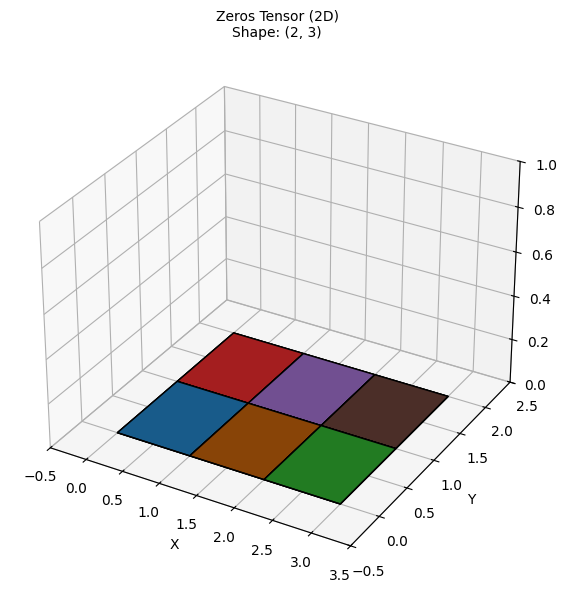


Ones Tensor (3x2, default float dtype):
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
Shape: torch.Size([3, 2])
Data type (dtype): torch.float32


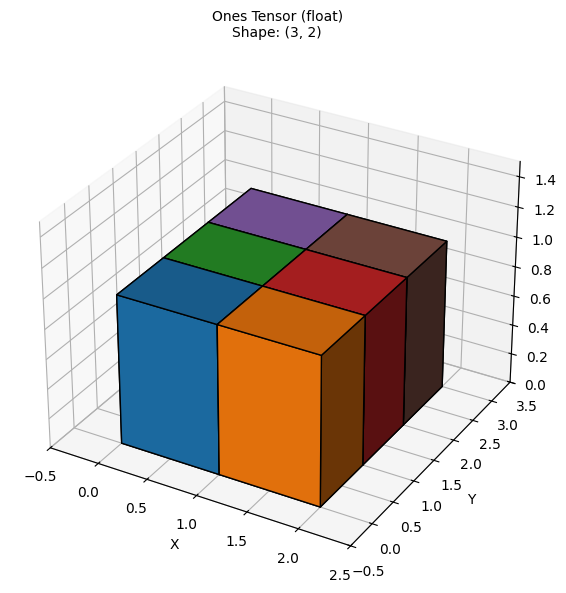


Ones Tensor (2x2, int32 dtype):
tensor([[1, 1],
        [1, 1]], dtype=torch.int32)
Shape: torch.Size([2, 2])
Data type (dtype): torch.int32


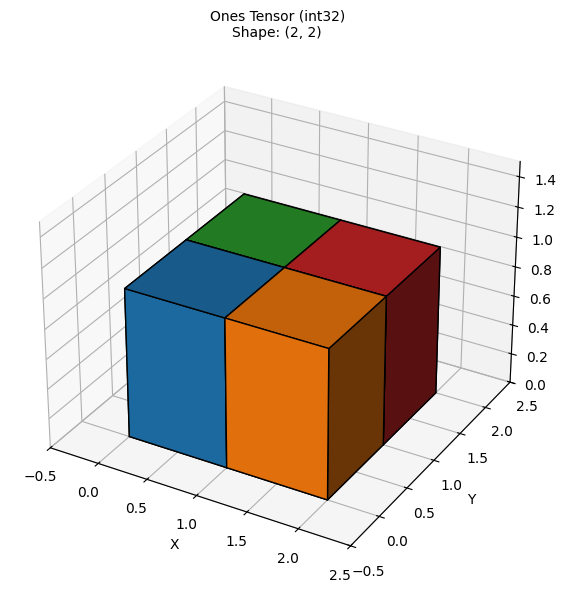


Random Tensor (uniform distribution [0,1) shape 2x3):
tensor([[0.3467, 0.0220, 0.6501],
        [0.1242, 0.7833, 0.5403]])
Shape: torch.Size([2, 3])
Data type (dtype): torch.float32


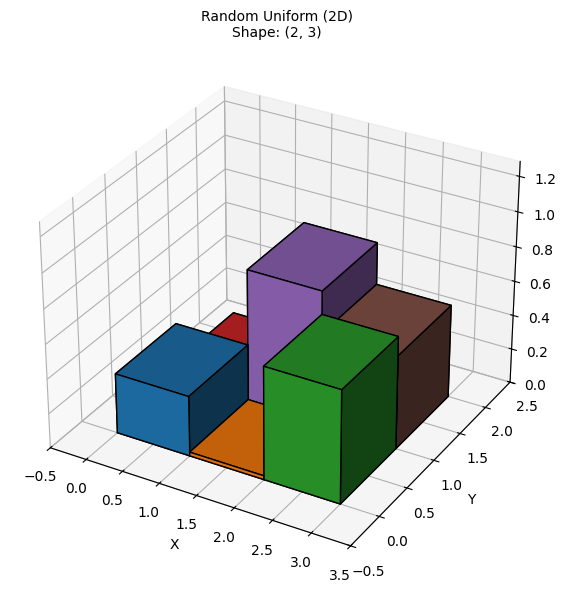


Random Tensor (standard normal distribution shape 2x3):
tensor([[-1.8493, -0.5800, -1.7976],
        [-1.2395, -0.5964,  0.2485]])
Shape: torch.Size([2, 3])
Data type (dtype): torch.float32


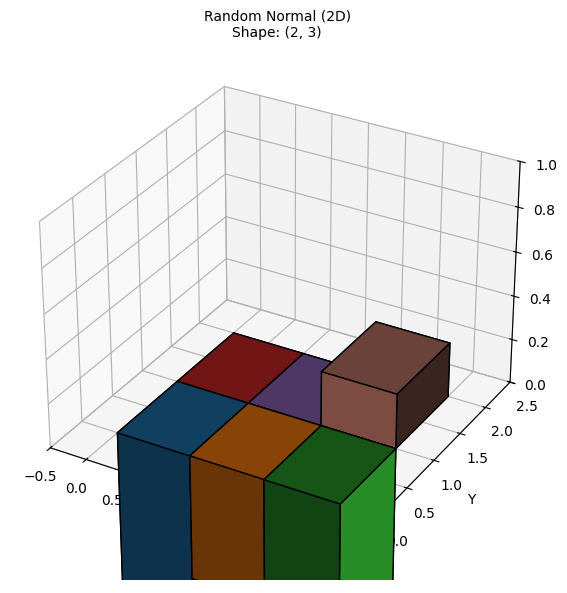


Recap on attributes for matrix_tensor:
Content:
tensor([[1, 2],
        [3, 4]])
Shape: torch.Size([2, 2])
Number of dimensions (ndim): 2
Data type: torch.int64

Value from scalar_tensor: 7


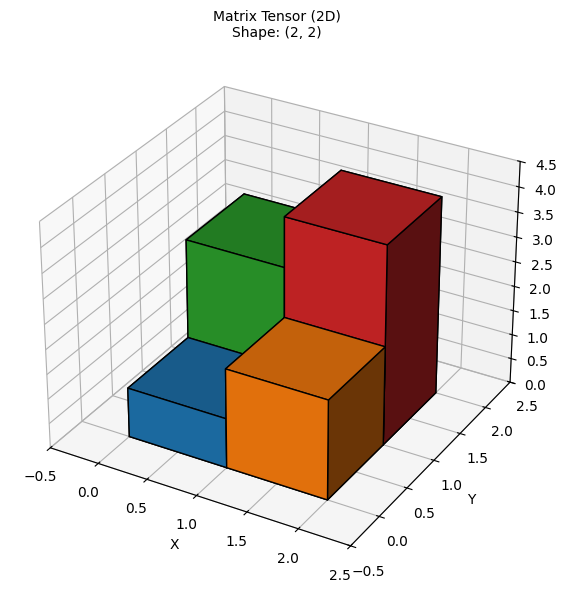

In [2]:
import torch

# 2.1 Scalar Tensor (0D)
scalar_tensor = torch.tensor(7)
print("Scalar Tensor:")
print(scalar_tensor)
print(f"Value: {scalar_tensor.item()} (use .item() to get Python number from a scalar tensor)")
print(f"Shape: {scalar_tensor.shape} (empty, indicating a scalar)")
print(f"Dimensions (ndim): {scalar_tensor.ndim} (0 dimensions)")
print(f"Data type (dtype): {scalar_tensor.dtype}")
plot_tensor_blocks(scalar_tensor, title="Scalar Tensor (0D)")

# 2.2 Vector Tensor (1D)
vector_tensor = torch.tensor([1, 2, 3])
print("\nVector Tensor:")
print(vector_tensor)
print(f"Shape: {vector_tensor.shape} (3 elements in the first dimension)")
print(f"Dimensions (ndim): {vector_tensor.ndim} (1 dimension)")
print(f"Data type (dtype): {vector_tensor.dtype}")
plot_tensor_blocks(vector_tensor, title="Vector Tensor (1D)")

# 3.1 Zeros tensor
zeros_tensor = torch.zeros(2, 3)  # 2x3 matrix of zeros
print("\nZeros Tensor (2x3):")
print(zeros_tensor)
print(f"Shape: {zeros_tensor.shape}")
print(f"Data type (dtype): {zeros_tensor.dtype}")
plot_tensor_blocks(zeros_tensor, title="Zeros Tensor (2D)")

# 3.2 Ones tensor (float + int32)
ones_tensor_float = torch.ones(3, 2)
print("\nOnes Tensor (3x2, default float dtype):")
print(ones_tensor_float)
print(f"Shape: {ones_tensor_float.shape}")
print(f"Data type (dtype): {ones_tensor_float.dtype}")
plot_tensor_blocks(ones_tensor_float, title="Ones Tensor (float)")

ones_tensor_int = torch.ones(2, 2, dtype=torch.int32)
print("\nOnes Tensor (2x2, int32 dtype):")
print(ones_tensor_int)
print(f"Shape: {ones_tensor_int.shape}")
print(f"Data type (dtype): {ones_tensor_int.dtype}")
plot_tensor_blocks(ones_tensor_int, title="Ones Tensor (int32)")

# 3.3 Random tensors
random_tensor_uniform = torch.rand(2, 3)
print("\nRandom Tensor (uniform distribution [0,1) shape 2x3):")
print(random_tensor_uniform)
print(f"Shape: {random_tensor_uniform.shape}")
print(f"Data type (dtype): {random_tensor_uniform.dtype}")
plot_tensor_blocks(random_tensor_uniform, title="Random Uniform (2D)")

random_tensor_normal = torch.randn(2, 3)
print("\nRandom Tensor (standard normal distribution shape 2x3):")
print(random_tensor_normal)
print(f"Shape: {random_tensor_normal.shape}")
print(f"Data type (dtype): {random_tensor_normal.dtype}")
plot_tensor_blocks(random_tensor_normal, title="Random Normal (2D)")

# Matrix recap
matrix_tensor = torch.tensor([[1, 2], [3, 4]])
print("\nRecap on attributes for matrix_tensor:")
print(f"Content:\n{matrix_tensor}")
print(f"Shape: {matrix_tensor.shape}")
print(f"Number of dimensions (ndim): {matrix_tensor.ndim}")
print(f"Data type: {matrix_tensor.dtype}")
print(f"\nValue from scalar_tensor: {scalar_tensor.item()}")
plot_tensor_blocks(matrix_tensor, title="Matrix Tensor (2D)")


In [3]:
import torch

# Step: calculate gradient
x_calc = torch.tensor(2.0, requires_grad=True)

# simple polynomial: y = x^2 + 2x + 1
y_calc = x_calc**2 + 2 * x_calc + 1
print(f"For x = {x_calc.item()}, y = {y_calc.item()}")

# y is scalar -> backward directly
y_calc.backward()
print(f"Calculated gradient dy/dx at x = {x_calc.item()}: {x_calc.grad}")


For x = 2.0, y = 9.0
Calculated gradient dy/dx at x = 2.0: 6.0


In [4]:
import torch

x_manage = torch.tensor(3.0, requires_grad=True)

# First calculation
y1 = x_manage**2
y1.backward()
print(f"Gradient after first backward pass (y=x^2, x=3): {x_manage.grad}  # expected 6.0")

# Second calculation WITHOUT zeroing gradients (accumulates)
y2 = x_manage**3
y2.backward()
print(f"Gradient after second backward pass (accumulated, y=x^3): {x_manage.grad}  # expected 6.0 + 27.0 = 33.0")

# Zero gradients
x_manage.grad.zero_()
print(f"Gradient after zeroing: {x_manage.grad}  # expected 0.0")

# Third calculation after zeroing
y3 = x_manage * 5
y3.backward()
print(f"Gradient after third backward pass (fresh, y=5x): {x_manage.grad}  # expected 5.0")


Gradient after first backward pass (y=x^2, x=3): 6.0  # expected 6.0
Gradient after second backward pass (accumulated, y=x^3): 33.0  # expected 6.0 + 27.0 = 33.0
Gradient after zeroing: 0.0  # expected 0.0
Gradient after third backward pass (fresh, y=5x): 5.0  # expected 5.0


In [5]:
import torch

x_no_grad = torch.tensor(4.0, requires_grad=True)
print(f"x_no_grad: {x_no_grad}, requires_grad: {x_no_grad.requires_grad}")

with torch.no_grad():
    y_no_grad = x_no_grad**2 + 2 * x_no_grad + 1
    print("Inside torch.no_grad():")
    print(f"y_no_grad = {y_no_grad}, y_no_grad.requires_grad = {y_no_grad.requires_grad}")

print(f"x_no_grad.grad after no_grad block: {x_no_grad.grad}  # expected None")

# Re-enable tracking normally
z_with_grad = x_no_grad**3
print(f"Outside no_grad: z_with_grad.requires_grad = {z_with_grad.requires_grad}")

# Ensure gradient starts clean
if x_no_grad.grad is not None:
    x_no_grad.grad.zero_()

z_with_grad.backward()
print(f"x_no_grad.grad after backward(): {x_no_grad.grad}")


x_no_grad: 4.0, requires_grad: True
Inside torch.no_grad():
y_no_grad = 25.0, y_no_grad.requires_grad = False
x_no_grad.grad after no_grad block: None  # expected None
Outside no_grad: z_with_grad.requires_grad = True
x_no_grad.grad after backward(): 48.0


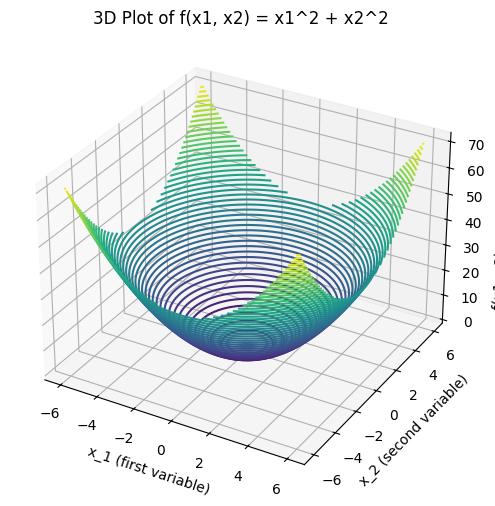

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def func_to_plot(x_coords, y_coords):
    return x_coords**2 + y_coords**2

x_range_plot = np.linspace(-6, 6, 50)
y_range_plot = np.linspace(-6, 6, 50)

X_mesh, Y_mesh = np.meshgrid(x_range_plot, y_range_plot)
Z_values = func_to_plot(X_mesh, Y_mesh)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.contour3D(X_mesh, Y_mesh, Z_values, 70)  # no explicit colors
ax.set_xlabel("x_1 (first variable)")
ax.set_ylabel("x_2 (second variable)")
ax.set_zlabel("f(x1, x2) = x1^2 + x2^2")
ax.set_title("3D Plot of f(x1, x2) = x1^2 + x2^2")
plt.show()


Simulating a learning rule to make weight_learn * 4 approach target...
Initial weight: 2.0000, Target: 10.0000
Learning Rate: 0.01, Iterations: 50
Iteration 01: weight=2.1600, output=8.0000, loss=4.0000
Iteration 10: weight=2.4894, output=9.9378, loss=0.0039
Iteration 20: weight=2.4998, output=9.9987, loss=0.0000
Iteration 30: weight=2.5000, output=10.0000, loss=0.0000
Iteration 40: weight=2.5000, output=10.0000, loss=0.0000
Iteration 50: weight=2.5000, output=10.0000, loss=0.0000

Final weight after 50 iterations: 2.5000
Final output (weight*4): 10.0000
Target: 10.0000, optimal weight should be ~ 2.5000


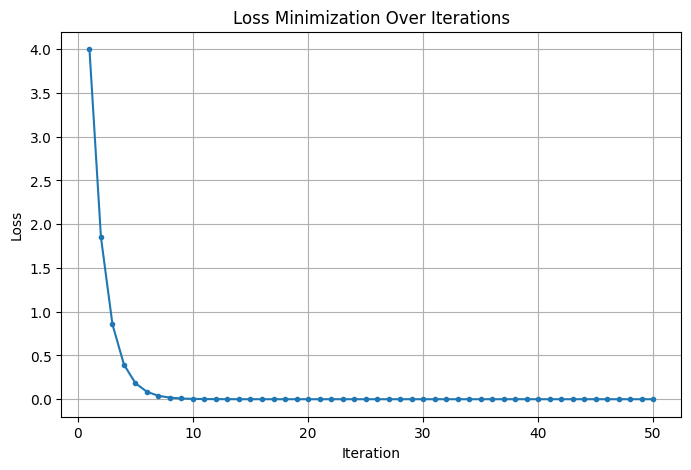

In [7]:
import torch
import matplotlib.pyplot as plt

# parameter to optimize
weight_learn = torch.tensor(2.0, requires_grad=True)

# target output
target_learn = torch.tensor(10.0)

# learning rate and iterations
learning_rate_learn = 0.01
num_iterations_learn = 50

print("Simulating a learning rule to make weight_learn * 4 approach target...")
print(f"Initial weight: {weight_learn.item():.4f}, Target: {target_learn.item():.4f}")
print(f"Learning Rate: {learning_rate_learn}, Iterations: {num_iterations_learn}")

losses_learn = []

for i in range(num_iterations_learn):
    # forward
    output_learn = weight_learn * 4

    # loss (MSE)
    loss_learn = (output_learn - target_learn) ** 2
    losses_learn.append(loss_learn.item())

    # zero grad
    if weight_learn.grad is not None:
        weight_learn.grad.zero_()

    # backward
    loss_learn.backward()

    # update (no grad tracking)
    with torch.no_grad():
        weight_learn -= learning_rate_learn * weight_learn.grad

    if (i + 1) % 10 == 0 or i == 0:
        print(f"Iteration {i+1:02d}: weight={weight_learn.item():.4f}, output={output_learn.item():.4f}, loss={loss_learn.item():.4f}")

print(f"\nFinal weight after {num_iterations_learn} iterations: {weight_learn.item():.4f}")
print(f"Final output (weight*4): {(weight_learn*4).item():.4f}")
print(f"Target: {target_learn.item():.4f}, optimal weight should be ~ {target_learn.item()/4:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_iterations_learn + 1), losses_learn, marker=".")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Minimization Over Iterations")
plt.grid(True)
plt.show()


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

# Optional: reproducibility
torch.manual_seed(42)


# Step 2: MLP using nn.Module
class MLPUsingModule(nn.Module):
    """
    A Multi-layer Perceptron defined using nn.Module.
    This approach offers maximum flexibility in designing the network architecture
    and defining the forward pass.
    """
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()  # modern Python 3 super() call
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.activation_fn = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.activation_fn(x)
        x = self.output_layer(x)
        return x


# Step 3: MLP using nn.Sequential
def create_mlp_via_sequential(input_size, hidden_size, output_size):
    """
    Creates an MLP using nn.Sequential.
    This is convenient for models where layers are applied in a simple linear sequence.
    """
    model = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, output_size),
    )
    return model


# Step 4: Practical training
def train_mlp(model, data, targets, learning_rate=0.001, epochs=100):
    """
    A basic training loop for an MLP model.
    It uses Stochastic Gradient Descent (SGD) optimizer and Mean Squared Error (MSE) loss.
    """
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    print(f"\nTraining model: {model.__class__.__name__}")

    for epoch in range(epochs):
        optimizer.zero_grad()
        predictions = model(data)
        loss = criterion(predictions, targets)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % (epochs // 10) == 0 or epoch == 0:
            print(f"Epoch {epoch+1:03d}/{epochs}, Loss: {loss.item():.4f}")


# Demo data
input_size = 4
hidden_size = 5
output_size = 3
num_samples = 10
num_epochs_demo = 50

input_data = torch.randn(num_samples, input_size)
target_data = torch.randn(num_samples, output_size)

# Train nn.Module version
mlp_module_instance = MLPUsingModule(input_size, hidden_size, output_size)
print("\nMLPUsingModule Architecture:")
print(mlp_module_instance)
train_mlp(mlp_module_instance, input_data, target_data, epochs=num_epochs_demo)

# Train nn.Sequential version
mlp_sequential_instance = create_mlp_via_sequential(input_size, hidden_size, output_size)
print("\nMLP Sequential Architecture:")
print(mlp_sequential_instance)
train_mlp(mlp_sequential_instance, input_data, target_data, epochs=num_epochs_demo)



MLPUsingModule Architecture:
MLPUsingModule(
  (hidden_layer): Linear(in_features=4, out_features=5, bias=True)
  (activation_fn): ReLU()
  (output_layer): Linear(in_features=5, out_features=3, bias=True)
)

Training model: MLPUsingModule
Epoch 001/50, Loss: 1.1773
Epoch 005/50, Loss: 1.1742
Epoch 010/50, Loss: 1.1704
Epoch 015/50, Loss: 1.1666
Epoch 020/50, Loss: 1.1629
Epoch 025/50, Loss: 1.1592
Epoch 030/50, Loss: 1.1556
Epoch 035/50, Loss: 1.1520
Epoch 040/50, Loss: 1.1485
Epoch 045/50, Loss: 1.1452
Epoch 050/50, Loss: 1.1418

MLP Sequential Architecture:
Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=3, bias=True)
)

Training model: Sequential
Epoch 001/50, Loss: 0.8921
Epoch 005/50, Loss: 0.8915
Epoch 010/50, Loss: 0.8906
Epoch 015/50, Loss: 0.8898
Epoch 020/50, Loss: 0.8890
Epoch 025/50, Loss: 0.8882
Epoch 030/50, Loss: 0.8874
Epoch 035/50, Loss: 0.8866
Epoch 040/50, Loss: 0.8858
Epoch 045/50, Loss: 0.